In [145]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

$
\begin{gather}
\frac{x-x_1}{x_2-x_1}=\frac{y-y_1}{y_2-y_1} \\
\Downarrow \\
(y_2-y_1)x+(x_1-x_2)y+(x_2y_1-x_1y_2)=0 \\
\Downarrow \\
y = \frac{y_2-y_1}{x_2-x_1}x + \frac{x_2y_1-x_1y_2}{x_2-x_1}
\end{gather}
$

In [205]:
def get_line(x1, y1, x2, y2):
    """
    Build a 2D line by two points.
    Returns line's function and weight vector (w0, w1, w2).
    Doesn't allow the line to be parallel to y-axis.
    """
    A = y2 - y1
    B = x1 - x2
    C = x2*y1 - x1*y2
    
    @np.vectorize
    def line(x):
        return A/-B*x + C/-B
    
    return line, np.array([C, A, B])

def plot():
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    
    plt.xlim(*INTERVAL*1.1)
    plt.ylim(*INTERVAL*1.1)
    ticks = np.linspace(*INTERVAL, 11)
    plt.xticks(ticks)
    plt.yticks(ticks)
    for pos in ['right', 'top']:   ax.spines[pos].set_color('none')
    for pos in ['left', 'bottom']: ax.spines[pos].set_position('zero')
    ax.set_aspect('equal')

    # The line
    plt.plot(INTERVAL*2, f(INTERVAL*2), linestyle=':', color='black')
    # Points
    plt.scatter(*points[:, 1:].T, c=dotp, cmap='RdYlGn', edgecolor='gray', linewidth=0.5)
    plt.colorbar()
    # Normal vector
    ax.arrow(0, 0, w[1], w[2], head_width=0.05, overhang=0.6)

    plt.show()

In [47]:
INTERVAL = np.array([-1., 1.])

In [207]:
n_points = 50
points = np.append(np.ones((n_points,1)),
                   np.random.uniform(*INTERVAL, (n_points, 2)),
                   axis=1)

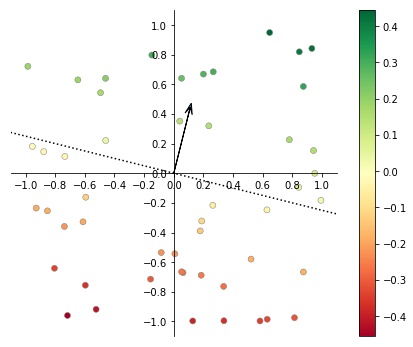

In [208]:
#support_points = np.random.uniform(*INTERVAL, 4)
support_points = [0, 0, -.4, .1]
f, w = get_line(*support_points)

dotp = points.dot(w)

plot()